In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3845320109088319270, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1183380696739370854
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8916817056160387065
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10586990183
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18352452805905246015
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
import os
import pprint
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!


In [0]:
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten,MaxPooling2D,GaussianDropout,GlobalAveragePooling2D
import cv2
from keras.constraints import max_norm
from  keras.models import load_model
import pandas as pd
import random
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import pickle
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.models import Model
from keras.layers import Input, Dense,Flatten
import warnings
warnings.filterwarnings('ignore')

# sift = cv2.xfeatures2d.SIFT_create()

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# 2. Load a file by ID and create local file.
FGD = drive.CreateFile({'id':'11vhpxOAhX4uSD7yrt6k5p8EWtsuOspD5'}) # replace fileid with Id of file you want to access
FGD.GetContentFile('data_batch_1') # now you can use export.csv 
data_batch_1 = pd.read_pickle('data_batch_1')

FGD = drive.CreateFile({'id':'1ktCkgBj7YtufHrfDnXSU6kWCP_ENDlzG'}) # replace fileid with Id of file you want to access
FGD.GetContentFile('data_batch_2') # now you can use export.csv 
data_batch_2 = pd.read_pickle('data_batch_2')

FGD = drive.CreateFile({'id':'1IQLPggFNSVsgwAy_enX_PfPBioBzLPH4'}) # replace fileid with Id of file you want to access
FGD.GetContentFile('data_batch_3') # now you can use export.csv 
data_batch_3 = pd.read_pickle('data_batch_3')

FGD = drive.CreateFile({'id':'1z_NjggP_YQpczb6fgAhwNpgbU5V8rfIo'}) # replace fileid with Id of file you want to access
FGD.GetContentFile('data_batch_4') # now you can use export.csv 
data_batch_4 = pd.read_pickle('data_batch_4')

FGD = drive.CreateFile({'id':'1wMY7qXbZdbZWqaDT1ydHq1qJSf5gOmA7'}) # replace fileid with Id of file you want to access
FGD.GetContentFile('data_batch_5') # now you can use export.csv 
data_batch_5 = pd.read_pickle('data_batch_5')

FGD = drive.CreateFile({'id':'1HX2ESp1wV8MqMAFyUApfyexmulYVeci6'}) # replace fileid with Id of file you want to access
FGD.GetContentFile('test_batch') # now you can use export.csv 
test_batch = pd.read_pickle('test_batch')


In [0]:
items = os.listdir('/content')

cifardataset=[]  
total_cifarlbl=[]
cifar_dataloc=['data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5']

for loc in cifar_dataloc:
    with open(loc, 'rb') as fo:
            dict = pickle.load(fo,encoding='bytes')

    total_cifarimg = (dict[b'data'].shape[0])
    lbl = (dict[b'labels'])

    print(dict[b'data'].shape,loc)
        
    count=0
    for t in range(total_cifarimg):
        l = (dict[b'data'][t])
        count=0
        cifarimg=np.ndarray(shape=(32,32,3), dtype=np.uint8)
        img_R = l[0:1024].reshape((32, 32))
        img_G = l[1024:2048].reshape((32, 32))
        img_B = l[2048:3072].reshape((32, 32))
        cifarimg = np.dstack((img_R, img_G, img_B))
#         cifarimg = np.reshape(l,(32,32,3))
        
        
        cifarimg = cv2.resize(cifarimg,(75,75))
        total_cifarlbl.append(lbl[t])
        cifardataset.append(cifarimg)
print(np.array(cifardataset).shape)
print(np.array(total_cifarlbl).shape)

(10000, 3072) data_batch_1
(10000, 3072) data_batch_2
(10000, 3072) data_batch_3
(10000, 3072) data_batch_4
(10000, 3072) data_batch_5
(50000, 75, 75, 3)
(50000,)


(10000, 75, 75, 3)


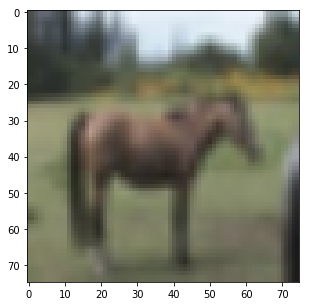

In [0]:
with open('test_batch', 'rb') as fo:
        dict_test = pickle.load(fo,encoding='bytes')
# dict_test
cifardataset_test=[]     

total_cifarimg_test = (dict_test[b'data'].shape[0])
total_cifarlbl_test = (dict_test[b'labels'])
count=0

# print(dict_test[b'data'].shape)

for t in range(total_cifarimg_test):
    l = (dict_test[b'data'][t])
    count=0
    cifarimg=np.ndarray(shape=(32,32,3), dtype=np.uint8)
#     print(cifarimg.shape)
#     for j in range(32):
#             for k in range(32):
#                 cifarimg[j,k,0]=l[count]
#                 cifarimg[j,k,1]=l[1024+count]
#                 cifarimg[j,k,2]=l[2048+count]
#                 cifarimg=cv2.resize(cifarimg,(32,32))
#                 count+=1
 
    img_R = l[0:1024].reshape((32, 32))
    img_G = l[1024:2048].reshape((32, 32))
    img_B = l[2048:3072].reshape((32, 32))
    cifarimg = np.dstack((img_R, img_G, img_B))
#     cifarimg = np.reshape(l,(32,32,3))
    
    cifarimg = cv2.resize(cifarimg,(75,75))
    cifardataset_test.append(cifarimg)
plt.figure(figsize=(5,5))
plt.imshow(cifarimg)
# plt.axis("off")
print(np.array(cifardataset_test).shape)

In [0]:
x_test = np.array(cifardataset_test)
y_test = total_cifarlbl_test
x_train = np.array(cifardataset)
y_train = total_cifarlbl

# (x_train, x_val, y_train, y_val) = train_test_split(
# cifardataset, total_cifarlbl, test_size=0.25, random_state=42)
x_train.shape

(50000, 75, 75, 3)

In [0]:
# x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
# x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
# input_shape = (32, 32, 3)
# Making sure that the values are float so that we can get decim
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
# x_train-=np.mean(x_train,axis=0)
# x_test-=np.mean(x_test,axis=0)
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (50000, 75, 75, 3)
Number of images in x_train 50000
Number of images in x_test 10000


In [0]:
model1 = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', 
                                                    input_tensor=None, input_shape=(75,75,3), 
                                                    pooling=None, classes=1000)

# model = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_tensor=None,
#                                        input_shape=None, pooling=None, classes=1000)


In [0]:
for i,layer in enumerate(model1.layers):
  print(i,layer.name)

0 input_2
1 conv2d_95
2 batch_normalization_95
3 activation_95
4 conv2d_96
5 batch_normalization_96
6 activation_96
7 conv2d_97
8 batch_normalization_97
9 activation_97
10 max_pooling2d_5
11 conv2d_98
12 batch_normalization_98
13 activation_98
14 conv2d_99
15 batch_normalization_99
16 activation_99
17 max_pooling2d_6
18 conv2d_103
19 batch_normalization_103
20 activation_103
21 conv2d_101
22 conv2d_104
23 batch_normalization_101
24 batch_normalization_104
25 activation_101
26 activation_104
27 average_pooling2d_10
28 conv2d_100
29 conv2d_102
30 conv2d_105
31 conv2d_106
32 batch_normalization_100
33 batch_normalization_102
34 batch_normalization_105
35 batch_normalization_106
36 activation_100
37 activation_102
38 activation_105
39 activation_106
40 mixed0
41 conv2d_110
42 batch_normalization_110
43 activation_110
44 conv2d_108
45 conv2d_111
46 batch_normalization_108
47 batch_normalization_111
48 activation_108
49 activation_111
50 average_pooling2d_11
51 conv2d_107
52 conv2d_109
53 co

In [0]:
# for layer in model1.layers:
#     layer.trainable=False
#  we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
# for layer in model1.layers[:278]:
#    layer.trainable = False
# for layer in model1.layers[279:]:
#    layer.trainable = True

In [0]:
add_model = Sequential()
add_model.add(model1)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.4))
# add_model.add(Dense(2048, activation='relu'))
# add_model.add(Dropout(0.4))
# kernel_regularizer=keras.regularizers.l2(0.01)
add_model.add(Dense(1024, activation='relu',kernel_regularizer=keras.regularizers.l2(0.007)))
add_model.add(Dropout(0.4))
add_model.add(Dense(10,activation='softmax'))
model = add_model
# model=model1
# x = model.output
# print(x.shape)
# x = keras.layers.GlobalAveragePooling2D()(x)
# # x = Flatten(input_shape=model.output_shape[1:])(x)
# print(x.shape)
# # x = Dense(4096, activation='relu')(x)
# # x = Dropout(0.4)(x)
# # x = Dense(2048, activation='relu')(x)
# # x = GaussianDropout(0.4)(x)
# x = Dense(1024, activation='relu')(x)

# # x = Dense(512, activation='relu')(x)
# # x = Dropout(0.4)(x)
# x = GaussianDropout(0.4)(x)
# predictions = Dense(10, activation='softmax')(x)
# model = Model(model.input, predictions)

In [0]:
lr=0.001
model.compile(optimizer=SGD(lr=lr, momentum=0.9),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# model.compile(optimizer=SGD(lr=lr, momentum=0.9),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [0]:
batch_size=16
history = model.fit(x=x_train,y=y_train,batch_size=batch_size,shuffle=True,validation_split=0.25,epochs=25)

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/25
37500/37500 [==============================] - 236s 6ms/step - loss: 8.4739 - acc: 0.4968 - val_loss: 5.8370 - val_acc: 0.7291
Epoch 2/25
37500/37500 [==============================] - 214s 6ms/step - loss: 4.5571 - acc: 0.7017 - val_loss: 4.8851 - val_acc: 0.6456
Epoch 3/25
37500/37500 [==============================] - 210s 6ms/step - loss: 2.6469 - acc: 0.7605 - val_loss: 1.9469 - val_acc: 0.8274
Epoch 4/25
37500/37500 [==============================] - 214s 6ms/step - loss: 1.5386 - acc: 0.8262 - val_loss: 1.1987 - val_acc: 0.8509
Epoch 5/25
37500/37500 [==============================] - 218s 6ms/step - loss: 0.9589 - acc: 0.8621 - val_loss: 0.9470 - val_acc: 0.8499
Epoch 6/25
37500/37500 [==============================] - 214s 6ms/step - loss: 0.6366 - acc: 0.8897 - val_loss: 0.6402 - val_acc: 0.8627
Epoch 7/25
37500/37500 [==============================] - 217s 6ms/step - 

In [0]:
# model.save("model.h5")
# model = load_model("model.h5")
# history1 = model.fit(x=x_train,y=y_train,initial_epoch=10,batch_size=batch_size,shuffle=True,validation_split=0.25,epochs=20)

In [0]:
history.history

{'acc': [0.49682666666348774,
  0.7016533333396912,
  0.7604533333269755,
  0.82624,
  0.8621333333333333,
  0.8897066666603088,
  0.8975466666603088,
  0.9253599999936422,
  0.9353599999936422,
  0.9443466666730245,
  0.9544266666666666,
  0.9618666666666666,
  0.97048,
  0.9611733333333333,
  0.9741066666666667,
  0.9799200000063578,
  0.9830666666730244,
  0.9849333333333333,
  0.9855733333333333,
  0.9867733333333333,
  0.9875199999936422,
  0.9893866666666666,
  0.98952,
  0.99056,
  0.9910133333333333],
 'loss': [8.473856189117432,
  4.557077303288778,
  2.646932119547526,
  1.5386415147336323,
  0.9588968475310008,
  0.6365612090746562,
  0.4850504514503479,
  0.3325595669301351,
  0.27041226005872093,
  0.22792239992936453,
  0.1853858358867963,
  0.15652207344214122,
  0.12609700651725134,
  0.15344559990008672,
  0.11300595816055933,
  0.09329685811599096,
  0.07880215202490488,
  0.07202463613351186,
  0.06614948670268059,
  0.06486232663591703,
  0.060113964001337686,
  0.0

In [0]:
# history2 = history.history
# history2['acc']= (history.history['acc']+history1.history['acc'])
# history2['loss']= (history.history['loss']+history1.history['loss'])
# history2['val_acc']= (history.history['val_acc']+history1.history['val_acc'])
# history2['val_loss']= (history.history['val_loss']+history1.history['val_loss'])
# history.history = history2

In [0]:
# # history.history
# def Remove(duplicate): 
#     final_list = [] 
#     for num in duplicate: 
#         if num not in final_list: 
#             final_list.append(num) 
#     return final_list 

# history.history['val_loss']=Remove(history.history['val_loss'])

# history.history['loss']=Remove(history.history['loss'])

# history.history['acc']=Remove(history.history['acc'])

# history.history['val_acc']=Remove(history.history['val_acc'])

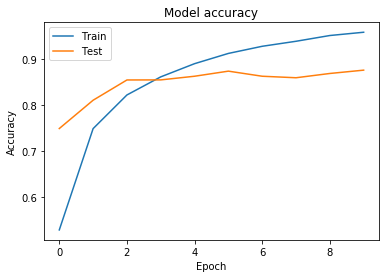

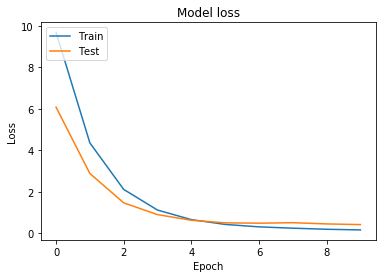

In [0]:
# Plot training & validation accuracy values
# plt.figure(figsize=(15,15))
# plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
# plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=batch_size)
loss_and_metrics

10000/10000 [==============================] - 10s 967us/step


[0.8442137875795365, 0.8053]

In [0]:
# len(h['val_loss'])

In [0]:
# ite=15
ite=ite+1
h= history.history
# del(h['Epoch'])
h['Iterations']=ite

h['DropOut']="Dropout-0.4 after each layer and L2(0.007) before softmax"
h["Batch_Size"]=batch_size
h['BatchNorm']="No"
h['Optimizer']="SGD"
h["Learning_Rate"]=lr
h["Loss_function"]="Sparse_Categorical_CrossEntropy"
h['Epoch']=list(np.arange(1,len(h['val_loss'])+1))
h['Test_acc']=loss_and_metrics[1]
h['Test_loss']=loss_and_metrics[0]
h['Trainable Layers']="No"
h['FC Layers']="1-1024"
logpd = pd.DataFrame(data=h)
# logpd= pd.DataFrame([np.array(np.zeros(3))],columns=['Iteration','val_loss','loss'])
# logpd.at[1,'val_loss']=h['val_loss']
# logpd.at[1,'loss']=h['loss']
logpd
# h
# h['val_loss']

,val_loss,val_acc,loss,acc,Iterations,DropOut,Batch_Size,BatchNorm,Optimizer,Learning_Rate,Loss_function,Epoch,Test_acc,Test_loss,Trainable Layers,FC Layers
0,6.045416,0.69672,8.534369,0.479360,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,1,0.8053,0.844214,No,1-1024
1,3.592375,0.70192,4.627445,0.677360,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,2,0.8053,0.844214,No,1-1024
2,2.398902,0.66792,2.953427,0.651413,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,3,0.8053,0.844214,No,1-1024
3,2.223462,0.71224,2.021548,0.662107,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,4,0.8053,0.844214,No,1-1024
4,1.141205,0.79816,1.313356,0.745333,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,5,0.8053,0.844214,No,1-1024
5,1.013230,0.74952,1.137398,0.720800,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,6,0.8053,0.844214,No,1-1024
6,0.888336,0.78152,0.935490,0.746320,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,7,0.8053,0.844214,No,1-1024
7,1.097493,0.76320,0.721769,0.797013,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,8,0.8053,0.844214,No,1-1024
8,0.806631,0.80776,0.650074,0.807413,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,9,0.8053,0.844214,No,1-1024
9,0.823044,0.80392,0.541206,0.838667,17,Dropout-0.4 after each layer and L2(0.007) bef...,16,No,SGD,0.001,Sparse_Categorical_CrossEntropy,10,0.8053,0.844214,No,1-1024


In [0]:
import csv
path = 'logs.csv'
days_file = open(path,'a+')
logpd.to_csv(days_file,sep = ',')
days_file.close()



In [0]:
from google.colab import files
files.download('logs.csv') 